# Optuna Demo Notebook

In [1]:
# # Uncomment and run once if you haven't installed Optuna in your local machine
# %pip install optuna

In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import time
import optuna
from IPython.display import display, HTML


In [38]:
df = pd.read_csv('cleaned_traffic_crashes_people.csv')
df.head()

,age,injury_classification,person_type_BICYCLE,person_type_DRIVER,person_type_NON-CONTACT VEHICLE,person_type_NON-MOTOR VEHICLE,person_type_PASSENGER,person_type_PEDESTRIAN,city_ADDISON,city_ALGONQUIN,...,driver_vision_BUILDINGS,driver_vision_MOVING VEHICLES,driver_vision_NOT OBSCURED,driver_vision_OTHER,driver_vision_PARKED VEHICLES,"driver_vision_TREES, PLANTS",driver_vision_UNKNOWN,driver_vision_WINDSHIELD (WATER/ICE),driver_vision_nan,driver_vision_infrequent_sklearn
0,41.00000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,38.18443,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,32.00000,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,38.18443,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,38.18443,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
df["injury_classification"].value_counts()

injury_classification
1    909
3     70
4     24
2     13
5      4
Name: count, dtype: int64

## Defining the Study Object
- A study object in Optuna is a collection of trials that share the same search space and objective function
- To create a study object and optimize your objective function, you can use the `optuna.create_study()` function and the `study.optimize()` method

In [40]:
# Define the objective function

def objective(trial):
    X, y = df.drop("injury_classification", axis=1), df.injury_classification
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Suggest hyperparameters
    alpha = trial.suggest_float("alpha", 0.0, 1.0)

    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    score = mean_squared_error(y_test, y_pred)
    return score

In [41]:
# Create a study object
study = optuna.create_study(study_name="basic_example", direction="minimize")

start = time.perf_counter()
study.optimize(objective, n_trials=100) # Optimize the objective function
end = time.perf_counter()

print(f"Time taken: {end-start:.6f} seconds")

[I 2024-11-25 04:08:46,970] A new study created in memory with name: basic_example
[I 2024-11-25 04:08:47,060] Trial 0 finished with value: 0.4776948960073385 and parameters: {'alpha': 0.053734555226207736}. Best is trial 0 with value: 0.4776948960073385.
[I 2024-11-25 04:08:47,476] Trial 1 finished with value: 0.46782819604457443 and parameters: {'alpha': 0.9919998473846373}. Best is trial 1 with value: 0.46782819604457443.
[I 2024-11-25 04:08:47,872] Trial 2 finished with value: 0.4684725206464395 and parameters: {'alpha': 0.8743798486205616}. Best is trial 1 with value: 0.46782819604457443.
[I 2024-11-25 04:08:48,272] Trial 3 finished with value: 0.4704521532516189 and parameters: {'alpha': 0.5833907977785869}. Best is trial 1 with value: 0.46782819604457443.
[I 2024-11-25 04:08:48,678] Trial 4 finished with value: 0.47111902179475695 and parameters: {'alpha': 0.5048946753920399}. Best is trial 1 with value: 0.46782819604457443.
[I 2024-11-25 04:08:49,060] Trial 5 finished with valu

Time taken: 38.496162 seconds


## Suggesting Hyperparameters

***Suggest Float*** <br>
`suggest_float(name, low, high)`: Suggests a floating-point value distributed between `low` and `high`

(optional) `step`: Defines the interval between possible values
`log` (default is `False`)

***Suggest Int*** <br>
`suggest_int(name, low, high)`: Suggests an integer value between `low` and `high`

***Suggest Categorical*** <br>
`suggest_categorical(name, choices)`: Suggests a categorical value from the given list of choices

In [42]:
# Define the objective function

def objective(trial):
    X, y = df.drop("injury_classification", axis=1), df.injury_classification
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Suggest hyperparameters
    n_estimators = trial.suggest_int("n_estimators", 10, 200)

    model = RandomForestClassifier(n_estimators=n_estimators)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    score = mean_squared_error(y_test, y_pred)
    return score

In [43]:
# Create a study object
study = optuna.create_study(study_name="int_rf_example", direction="minimize")

start = time.perf_counter()
study.optimize(objective, n_trials=10) # Optimize the objective function
end = time.perf_counter()

print(f"Time taken: {end-start:.6f} seconds")

[I 2024-11-25 04:09:25,665] A new study created in memory with name: int_rf_example
[I 2024-11-25 04:09:25,816] Trial 0 finished with value: 0.6274509803921569 and parameters: {'n_estimators': 40}. Best is trial 0 with value: 0.6274509803921569.
[I 2024-11-25 04:09:25,958] Trial 1 finished with value: 0.5163398692810458 and parameters: {'n_estimators': 40}. Best is trial 1 with value: 0.5163398692810458.
[I 2024-11-25 04:09:26,572] Trial 2 finished with value: 0.6666666666666666 and parameters: {'n_estimators': 160}. Best is trial 1 with value: 0.5163398692810458.
[I 2024-11-25 04:09:26,683] Trial 3 finished with value: 0.673202614379085 and parameters: {'n_estimators': 41}. Best is trial 1 with value: 0.5163398692810458.
[I 2024-11-25 04:09:27,261] Trial 4 finished with value: 0.6666666666666666 and parameters: {'n_estimators': 176}. Best is trial 1 with value: 0.5163398692810458.
[I 2024-11-25 04:09:27,669] Trial 5 finished with value: 0.6797385620915033 and parameters: {'n_estimator

Time taken: 3.410679 seconds


In [44]:
print("Best hyperparameters:", study.best_params)
print("Best value:", study.best_value)

Best hyperparameters: {'n_estimators': 40}
Best value: 0.5163398692810458


## Hyperparameter tuning comparison using GridSearch vs Optuna

In [45]:
# Load Boston Housing dataset from external source
df = pd.read_csv(
    filepath_or_buffer="http://lib.stat.cmu.edu/datasets/boston",
    delim_whitespace=True,
    skiprows=21,
    header=None,
)

columns = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV',
]

# Flatten all the values into a single long list and remove the nulls
values_w_nulls = df.values.flatten()
all_values = values_w_nulls[~np.isnan(values_w_nulls)]

# Reshape the values to have 14 columns and make a new df out of them
df = pd.DataFrame(
    data=all_values.reshape(-1, len(columns)),
    columns=columns,
)
df1 = df
boston = df

/tmp/ipykernel_36219/834794539.py:2: FutureWarning:

The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead



In [46]:
# Split data into features and target
X = boston.drop(columns=['MEDV'])
y = boston['MEDV']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Define models and parameter grids
models = {
    'RandomForest': (RandomForestRegressor(), {
        'n_estimators': [50, 100],
        'max_depth': [3, 5, 10]
    }),
    'GradientBoosting': (GradientBoostingRegressor(), {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }),
    'XGBoost': (XGBRegressor(objective='reg:squarederror'), {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }),
    'SVR': (SVR(), {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    })
}

In [48]:
# Perform GridSearch with cross-validation for each model and store only the best result
results = []
total_start_time = time.time()

best_model_overall = None
best_mse_overall = float('inf')
best_model_name = None
best_params_overall = None

for model_name, (model, param_grid) in models.items():
    # print(f"Running GridSearchCV for {model_name}...")
    start_time = time.time()
    grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    end_time = time.time()

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Calculate MSE on the test set
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    # Store the best model if it has the lowest MSE
    if mse < best_mse_overall:
        best_mse_overall = mse
        best_model_overall = best_model
        best_model_name = model_name
        best_params_overall = best_params

# Store the total runtime for GridSearch
total_end_time = time.time()
gridsearch_total_time = total_end_time - total_start_time

# Store the best GridSearch result
result = {
    'Dataset': 'Original',
    'Method': 'GridSearch',
    'Model': best_model_name,
    'Best Parameters': best_params_overall,
    'Total Runtime (s)': gridsearch_total_time
}

results.append(result)

print(result)

{'Dataset': 'Original', 'Method': 'GridSearch', 'Model': 'XGBoost', 'Best Parameters': {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}, 'Total Runtime (s)': 82.51377177238464}


## Optuna Trial

In [49]:
# Define the objective function for Optuna
def objective(trial):
    model_name = trial.suggest_categorical('model', ['RandomForest', 'GradientBoosting', 'XGBoost', 'SVR'])
    
    if model_name == 'RandomForest':
        n_estimators = trial.suggest_int('n_estimators', 50, 200)
        max_depth = trial.suggest_int('max_depth', 3, 10)
        model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
    elif model_name == 'GradientBoosting':
        n_estimators = trial.suggest_int('n_estimators', 50, 200)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2)
        max_depth = trial.suggest_int('max_depth', 3, 10)
        model = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)
    elif model_name == 'XGBoost':
        n_estimators = trial.suggest_int('n_estimators', 50, 200)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2)
        max_depth = trial.suggest_int('max_depth', 3, 10)
        model = XGBRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, objective='reg:squarederror')
    elif model_name == 'SVR':
        C = trial.suggest_float('C', 0.1, 10)
        kernel = trial.suggest_categorical('kernel', ['linear', 'rbf'])
        model = SVR(C=C, kernel=kernel)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

In [50]:
# Run Optuna optimization
study_start_time = time.time()
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)
study_end_time = time.time()

# Adding summary of the Optuna results
optuna_best_params = study.best_trial.params
optuna_best_value = study.best_trial.value
optuna_total_time = study_end_time - study_start_time

result = {
    'Dataset': 'Original',
    'Method': 'Optuna',
    'Model': study.best_trial.params.get('model'),
    'Best Parameters': optuna_best_params,
    'Total Runtime (s)': optuna_total_time
}
results.append(result)

print(result)

[I 2024-11-25 04:10:53,908] A new study created in memory with name: no-name-37f434c9-c6fc-440a-bab8-31166240d296
[I 2024-11-25 04:10:54,172] Trial 0 finished with value: 8.784184603075868 and parameters: {'model': 'XGBoost', 'n_estimators': 131, 'learning_rate': 0.18780072912907836, 'max_depth': 8}. Best is trial 0 with value: 8.784184603075868.
[I 2024-11-25 04:10:54,657] Trial 1 finished with value: 9.025951939632327 and parameters: {'model': 'RandomForest', 'n_estimators': 96, 'max_depth': 6}. Best is trial 0 with value: 8.784184603075868.
[I 2024-11-25 04:10:54,675] Trial 2 finished with value: 45.06615448524173 and parameters: {'model': 'SVR', 'C': 8.670160084460276, 'kernel': 'rbf'}. Best is trial 0 with value: 8.784184603075868.
[I 2024-11-25 04:10:54,892] Trial 3 finished with value: 4.478796501926919 and parameters: {'model': 'GradientBoosting', 'n_estimators': 80, 'learning_rate': 0.09041086360539885, 'max_depth': 6}. Best is trial 3 with value: 4.478796501926919.
[I 2024-11

{'Dataset': 'Original', 'Method': 'Optuna', 'Model': 'GradientBoosting', 'Best Parameters': {'model': 'GradientBoosting', 'n_estimators': 149, 'learning_rate': 0.08598656148573766, 'max_depth': 6}, 'Total Runtime (s)': 46.024049282073975}


### Using derived features

#### GridSearch

In [51]:
# Create new columns by multiplying each column with every other column

for i in range(len(X.columns)):
    for j in range(i, len(X.columns)):
        col1 = X.columns[i]
        col2 = X.columns[j]
        new_col_name = f"{col1}_{col2}"
        df1[new_col_name] = X[col1] * X[col2]

# Display the updated DataFrame
#print(df_extended)

X_der=df1.drop('MEDV', axis=1) #Remove the target column X
y_der=df1['MEDV']
len(X_der)
X_der.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,TAX_TAX,TAX_PTRATIO,TAX_B,TAX_LSTAT,PTRATIO_PTRATIO,PTRATIO_B,PTRATIO_LSTAT,B_B,B_LSTAT,LSTAT_LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,87616.0,4528.8,117482.40,1474.08,234.09,6072.570,76.194,157529.6100,1976.5620,24.8004
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,58564.0,4307.6,96049.80,2211.88,316.84,7064.820,162.692,157529.6100,3627.6660,83.5396
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,58564.0,4307.6,95064.86,975.26,316.84,6992.374,71.734,154315.4089,1583.1049,16.2409
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,49284.0,4151.4,87607.86,652.68,349.69,7379.581,54.978,155732.8369,1160.2122,8.6436
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,49284.0,4151.4,88111.80,1183.26,349.69,7422.030,99.671,157529.6100,2115.4770,28.4089


In [52]:
X_train_der, X_test_der, y_train_der, y_test_der = train_test_split(X_der, y_der, test_size=0.2, random_state=42)

In [53]:
# Define models and parameter grids
models = {
    'RandomForest': (RandomForestRegressor(), {
        'n_estimators': [50, 100],
        'max_depth': [3, 5, 10]
    }),
    'GradientBoosting': (GradientBoostingRegressor(), {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }),
    'XGBoost': (XGBRegressor(objective='reg:squarederror'), {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }),
    'SVR': (SVR(), {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    })
}

In [54]:
# Perform GridSearch with cross-validation for each model and store only the best result
results_mod = []
total_start_time = time.time()

best_model_overall = None
best_mse_overall = float('inf')
best_model_name = None
best_params_overall = None

for model_name, (model, param_grid) in models.items():
    # print(f"Running GridSearchCV for {model_name}...")
    start_time = time.time()
    grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_der, y_train_der)
    end_time = time.time()

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Calculate MSE on the test set
    y_pred_der = best_model.predict(X_test_der)
    mse = mean_squared_error(y_test_der, y_pred_der)

    # Store the best model if it has the lowest MSE
    if mse < best_mse_overall:
        best_mse_overall = mse
        best_model_overall = best_model
        best_model_name = model_name
        best_params_overall = best_params

# Store the total runtime for GridSearch
total_end_time = time.time()
gridsearch_total_time = total_end_time - total_start_time

# Store the best GridSearch result
result = {
    'Dataset': 'Modified',
    'Method': 'GridSearch',
    'Model': best_model_name,
    'Best Parameters': best_params_overall,
    'Total Runtime (s)': gridsearch_total_time
}
results_mod.append(result)

print(result)

{'Dataset': 'Modified', 'Method': 'GridSearch', 'Model': 'XGBoost', 'Best Parameters': {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}, 'Total Runtime (s)': 2503.5394566059113}


#### Optuna

In [55]:
# Define the objective function for Optuna
def objective(trial):
    model_name = trial.suggest_categorical('model', ['RandomForest', 'GradientBoosting', 'XGBoost', 'SVR'])
    
    if model_name == 'RandomForest':
        n_estimators = trial.suggest_int('n_estimators', 50, 200)
        max_depth = trial.suggest_int('max_depth', 3, 10)
        model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
    elif model_name == 'GradientBoosting':
        n_estimators = trial.suggest_int('n_estimators', 50, 200)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2)
        max_depth = trial.suggest_int('max_depth', 3, 10)
        model = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)
    elif model_name == 'XGBoost':
        n_estimators = trial.suggest_int('n_estimators', 50, 200)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2)
        max_depth = trial.suggest_int('max_depth', 3, 10)
        model = XGBRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, objective='reg:squarederror')
    elif model_name == 'SVR':
        C = trial.suggest_float('C', 0.1, 10)
        kernel = trial.suggest_categorical('kernel', ['linear', 'rbf'])
        model = SVR(C=C, kernel=kernel)
    
    model.fit(X_train_der, y_train_der)
    y_pred_der = model.predict(X_test_der)
    mse = mean_squared_error(y_test_der, y_pred_der)
    return mse


In [56]:
# Run Optuna optimization
study_start_time = time.time()
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)
study_end_time = time.time()

# Adding summary of the Optuna results
optuna_best_params = study.best_trial.params
optuna_best_value = study.best_trial.value
optuna_total_time = study_end_time - study_start_time

result = {
    'Dataset': 'Modified',
    'Method': 'Optuna',
    'Model': study.best_trial.params.get('model'),
    'Best Parameters': optuna_best_params,
    'Total Runtime (s)': optuna_total_time
}
results_mod.append(result)

print(result)

[I 2024-11-25 04:53:39,534] A new study created in memory with name: no-name-67842dd2-95e8-4f68-866c-fa8c3a7355db
[I 2024-11-25 04:53:39,573] Trial 0 finished with value: 48.89202523271117 and parameters: {'model': 'SVR', 'C': 5.761070525125833, 'kernel': 'rbf'}. Best is trial 0 with value: 48.89202523271117.
[I 2024-11-25 04:53:41,462] Trial 1 finished with value: 6.553072347759385 and parameters: {'model': 'GradientBoosting', 'n_estimators': 85, 'learning_rate': 0.06993799284043839, 'max_depth': 6}. Best is trial 1 with value: 6.553072347759385.
[I 2024-11-25 04:53:42,233] Trial 2 finished with value: 12.931574050713468 and parameters: {'model': 'RandomForest', 'n_estimators': 87, 'max_depth': 3}. Best is trial 1 with value: 6.553072347759385.
[I 2024-11-25 04:53:46,158] Trial 3 finished with value: 9.419679101200838 and parameters: {'model': 'GradientBoosting', 'n_estimators': 123, 'learning_rate': 0.17720937727997854, 'max_depth': 10}. Best is trial 1 with value: 6.553072347759385.

{'Dataset': 'Modified', 'Method': 'Optuna', 'Model': 'XGBoost', 'Best Parameters': {'model': 'XGBoost', 'n_estimators': 129, 'learning_rate': 0.13751990932647074, 'max_depth': 8}, 'Total Runtime (s)': 1950.7139365673065}


In [57]:
# Create a summary dataframe by concatenating the original and modified results
results_df = pd.DataFrame(results)
results_mod_df = pd.DataFrame(results_mod)

summary = pd.concat([results_df, results_mod_df], ignore_index=True)

# Convert to an HTML table and display
html_table = summary.to_html()
display(HTML(html_table))

,Dataset,Method,Model,Best Parameters,Total Runtime (s)
0,Original,GridSearch,XGBoost,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}",82.513772
1,Original,Optuna,GradientBoosting,"{'model': 'GradientBoosting', 'n_estimators': 149, 'learning_rate': 0.08598656148573766, 'max_depth': 6}",46.024049
2,Modified,GridSearch,XGBoost,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}",2503.539457
3,Modified,Optuna,XGBoost,"{'model': 'XGBoost', 'n_estimators': 129, 'learning_rate': 0.13751990932647074, 'max_depth': 8}",1950.713937


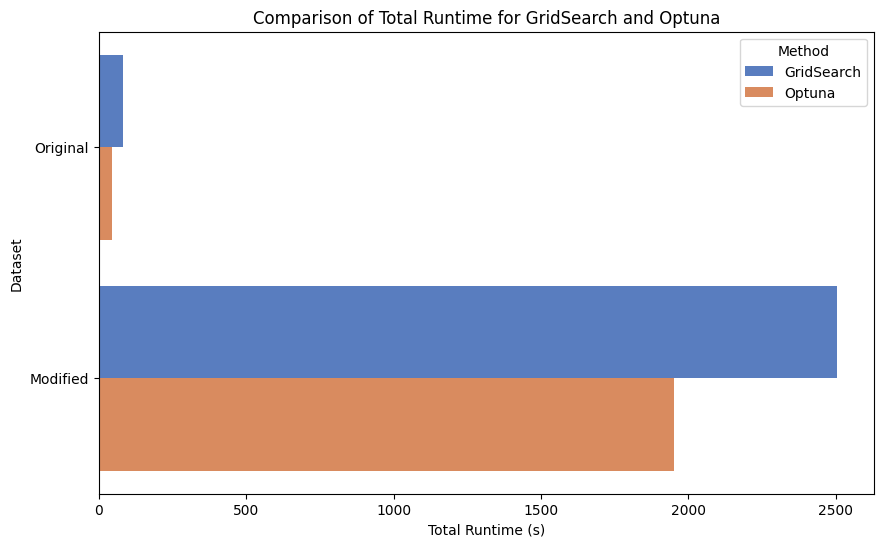

In [58]:
# Assuming 'summary' is the DataFrame that combines both results
# Melt the DataFrame to make it suitable for plotting with seaborn
import matplotlib.pyplot as plt
import seaborn as sns

summary_melted = summary.melt(id_vars=['Dataset', 'Method'], value_vars=['Total Runtime (s)'],
                              var_name='Metric', value_name='Value')
# Create a horizontal grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Value', y='Dataset', hue='Method', data=summary_melted, palette = 'muted')
plt.xlabel('Total Runtime (s)')
plt.ylabel('Dataset')
plt.title('Comparison of Total Runtime for GridSearch and Optuna')
plt.legend(title='Method')
plt.show()

### Time budget and Error Tolerance

_study.optimize(objective, timeout=600, catch=(ValueError,), n_trials=100)_

`timeout=600`: This parameter sets a maximum time limit (in seconds) for the optimization process. Optuna ensures that the study stops after 600 seconds, regardless of the number of trials completed. Note that the current trial must finish before the timeout is enforced.

`catch=(ValueError,)`: This parameter specifies exceptions that Optuna should catch during optimization. If a trial raises a ValueError (e.g., due to invalid hyperparameter combinations or other issues), Optuna gracefully skips the trial and continues optimization without crashing.

In [73]:
# Define the objective function for Optuna
def objective(trial):
    model_name = trial.suggest_categorical('model', ['RandomForest', 'GradientBoosting', 'XGBoost', 'SVR'])
    
    if model_name == 'RandomForest':
        n_estimators = trial.suggest_int('n_estimators', 50, 200)
        max_depth = trial.suggest_int('max_depth', 3, 10)
        model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
    elif model_name == 'GradientBoosting':
        n_estimators = trial.suggest_int('n_estimators', 50, 200)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2)
        max_depth = trial.suggest_int('max_depth', 3, 10)
        model = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)
    elif model_name == 'XGBoost':
        n_estimators = trial.suggest_int('n_estimators', 50, 200)
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2)
        max_depth = trial.suggest_int('max_depth', 3, 10)
        model = XGBRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, objective='reg:squarederror')
    elif model_name == 'SVR':
        C = trial.suggest_float('C', 0.1, 10)
        kernel = trial.suggest_categorical('kernel', ['linear', 'rbf'])
        model = SVR(C=C, kernel=kernel)
    
    model.fit(X_train_der, y_train_der)
    y_pred_der = model.predict(X_test_der)
    mse = mean_squared_error(y_test_der, y_pred_der)
    return mse

In [75]:
# We will run the Optuna studay again with time budget and Error Tolerance
study_start_time = time.time()
study = optuna.create_study(direction='minimize')
study.optimize(objective, timeout=600, catch=(ValueError,), n_trials=100) # Set the time to 600 secs and 100 trials
study_end_time = time.time()

print("Best Parameters:", study.best_trial.params.get('model'), study.best_params)
print("Best MSE:", study.best_value)
print(f"Number of completed trials within the time budget: {len(study.trials)}")
# print(f"Best trial completed: {study.best_trial}")

[I 2024-11-25 07:51:22,965] A new study created in memory with name: no-name-a1570b71-4edf-48e0-a5d5-b6395b368db0
[I 2024-11-25 07:51:25,153] Trial 0 finished with value: 9.752626259049702 and parameters: {'model': 'GradientBoosting', 'n_estimators': 144, 'learning_rate': 0.01484047249171977, 'max_depth': 4}. Best is trial 0 with value: 9.752626259049702.
[I 2024-11-25 07:51:26,761] Trial 1 finished with value: 6.775376286955814 and parameters: {'model': 'XGBoost', 'n_estimators': 121, 'learning_rate': 0.13816660133477457, 'max_depth': 9}. Best is trial 1 with value: 6.775376286955814.
[I 2024-11-25 07:51:27,084] Trial 2 finished with value: 6.3414369499112055 and parameters: {'model': 'XGBoost', 'n_estimators': 108, 'learning_rate': 0.14555060229322095, 'max_depth': 4}. Best is trial 2 with value: 6.3414369499112055.
[I 2024-11-25 07:51:28,872] Trial 3 finished with value: 8.273985596512079 and parameters: {'model': 'XGBoost', 'n_estimators': 177, 'learning_rate': 0.08102579363498731,

Best Parameters: XGBoost {'model': 'XGBoost', 'n_estimators': 108, 'learning_rate': 0.14555060229322095, 'max_depth': 4}
Best MSE: 6.3414369499112055
Number of completed trials within the time budget: 7


_So even if we set 100 trials, the model stops after 10 minutes (600 seconds) and provides the best parameters from the completed trials._

## Other Optuna features

### Performing Multi-objective Optimization and Visualizations

Multi-objective optimization in Optuna involves finding a set of trade-off solutions that balance multiple conflicting objectives, and its visualization tools, such as Pareto front and optimization history plots, help analyze these trade-offs and the optimization process effectively.

In [76]:
# Let us use the Boston Cancer dataset for this example.
from sklearn.datasets import load_breast_cancer

cancer_dataset = load_breast_cancer()
cancer_df = pd.DataFrame(data=cancer_dataset['data'], 
                         columns=cancer_dataset['feature_names'])
cancer_df['target'] = cancer_dataset['target']
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [77]:
# Split the data into training and test sets.
X = cancer_df.drop('target', axis=1)
y = cancer_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y, 
                                                    random_state=1)

In [78]:
# Define the objective function.
def objective(trial):
    # Define the hyperparameters to be optimized.
    n_neighbors = trial.suggest_int('n_neighbors', 1, 50)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    metric = trial.suggest_categorical('metric', ['euclidean', 'manhattan', 
                                                  'chebyshev', 'minkowski'])
    if metric == 'minkowski':
        p = trial.suggest_int('p', 3, 5)
    else:
        p = None

    model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, 
                                 metric=metric, p=p)

    start_time = time.perf_counter()
    model.fit(X_train, y_train)
    end_time = time.perf_counter()

    # Use accuracy score and training time to evaluate the model's performance.
    accuracy_score = model.score(X_test, y_test)
    training_time = end_time - start_time
    
    return accuracy_score, training_time

In [79]:
# Define a study for hyperparameter optimization.
# Notice the parameter directions=['maximize', 'minimize'] (PLURAL)
# This means we want to find the hyperparameters 
# that maximize accuracy score and mimimize build time.
study = optuna.create_study(study_name='int_categorical_knn_example', 
                            directions=['maximize', 'minimize'])
study.optimize(objective, n_trials=20)

[I 2024-11-25 08:06:03,936] A new study created in memory with name: int_categorical_knn_example
[I 2024-11-25 08:06:03,960] Trial 0 finished with values: [0.9230769230769231, 0.0028596632182598114] and parameters: {'n_neighbors': 23, 'weights': 'uniform', 'metric': 'manhattan'}.
[I 2024-11-25 08:06:04,005] Trial 1 finished with values: [0.9300699300699301, 0.001764439046382904] and parameters: {'n_neighbors': 19, 'weights': 'distance', 'metric': 'minkowski', 'p': 4}.
[I 2024-11-25 08:06:04,015] Trial 2 finished with values: [0.9370629370629371, 0.002009507268667221] and parameters: {'n_neighbors': 32, 'weights': 'distance', 'metric': 'chebyshev'}.
[I 2024-11-25 08:06:04,024] Trial 3 finished with values: [0.9300699300699301, 0.002010207623243332] and parameters: {'n_neighbors': 22, 'weights': 'distance', 'metric': 'chebyshev'}.
[I 2024-11-25 08:06:04,069] Trial 4 finished with values: [0.9230769230769231, 0.0020155981183052063] and parameters: {'n_neighbors': 37, 'weights': 'uniform',

In [80]:
# Show the trials with the best accuracies and/or training times.
print('---Best Trials---')
for trial in study.best_trials:
    print(f'\nTrial No. {trial.number}')
    print(f'Accuracy: {trial.values[0] * 100:.2f}% | Training Time: {trial.values[1]:.10f} seconds')
    print(f'Parameters: {trial.params}')

---Best Trials---

Trial No. 9
Accuracy: 94.41% | Training Time: 0.0014688112 seconds
Parameters: {'n_neighbors': 18, 'weights': 'uniform', 'metric': 'manhattan'}

Trial No. 10
Accuracy: 93.01% | Training Time: 0.0014223382 seconds
Parameters: {'n_neighbors': 4, 'weights': 'distance', 'metric': 'minkowski', 'p': 5}

Trial No. 17
Accuracy: 95.10% | Training Time: 0.0021082163 seconds
Parameters: {'n_neighbors': 10, 'weights': 'distance', 'metric': 'euclidean'}


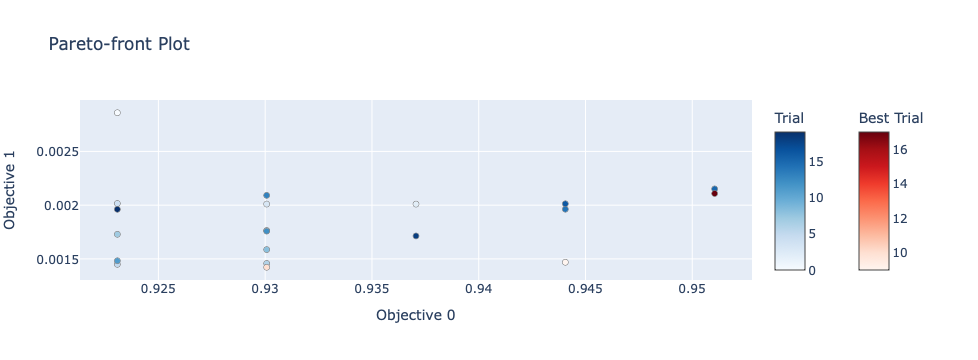

In [81]:
# Use the Pareto Front to Pareto Front show the trade-offs between conflicting objectives, 
# highlighting the set of optimal solutions where improving one objective would worsen another.
optuna.visualization.plot_pareto_front(study)

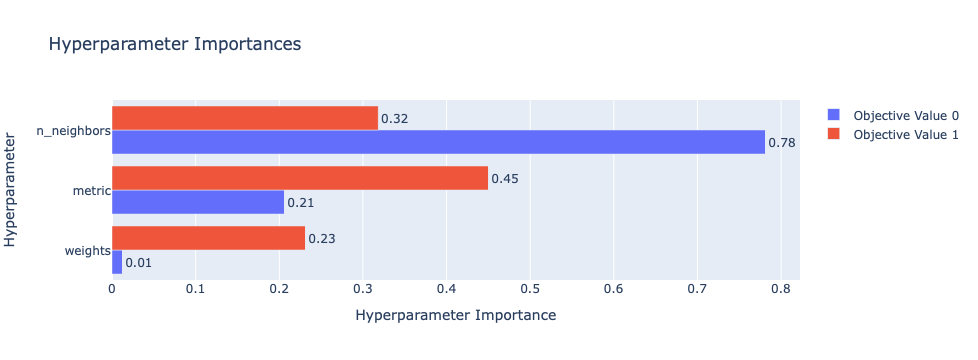

In [82]:
# Use the Parameter Importance plot to visualize the relative influence of each hyperparameter 
# on the objectives, helping to identify which parameters have the most significant impact.
optuna.visualization.plot_param_importances(study)

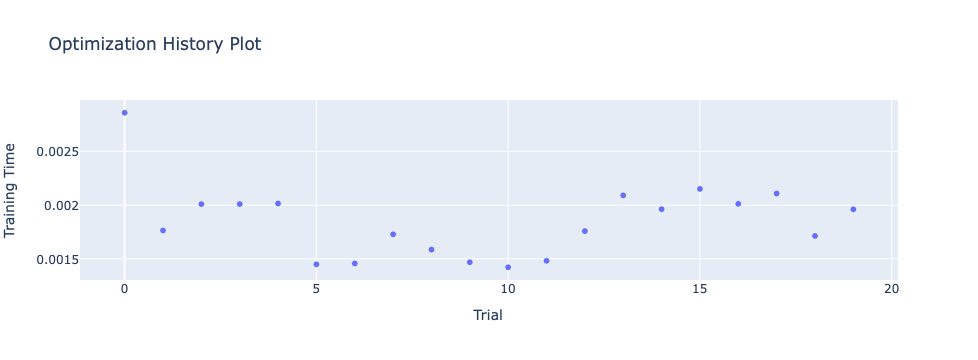

In [83]:
# Use the Optimization History plot to track the progress of objective values over trials, 
# revealing how the optimization process improves performance and converges toward better solutions.
optuna.visualization.plot_optimization_history(study, target=lambda trial: trial.values[0], 
                                               target_name="Accuracy Score")

optuna.visualization.plot_optimization_history(study, target=lambda trial: trial.values[1], 
                                               target_name="Training Time")